In [3]:
def create_circuit(num_qubits, add_measurement=False):
    qc = QuantumCircuit(num_qubits, num_qubits)
    if add_measurement:
        qc.measure(range(num_qubits), range(num_qubits))
    return qc

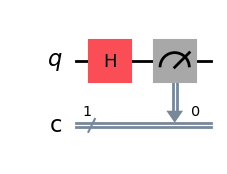

In [1]:
# Enable inline plotting
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create a circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Step 2: Apply a Hadamard gate to create superposition
qc.h(0)

# Step 3: Create a separate measurement circuit (same effect as create_circuit(1, True))
measurement_circuit = QuantumCircuit(1, 1)
measurement_circuit.measure(0, 0)

# Step 4: Concatenate the two circuits
full_circuit = qc.compose(measurement_circuit)

# Step 5: Draw the full circuit
full_circuit.draw(output='mpl')
plt.show()

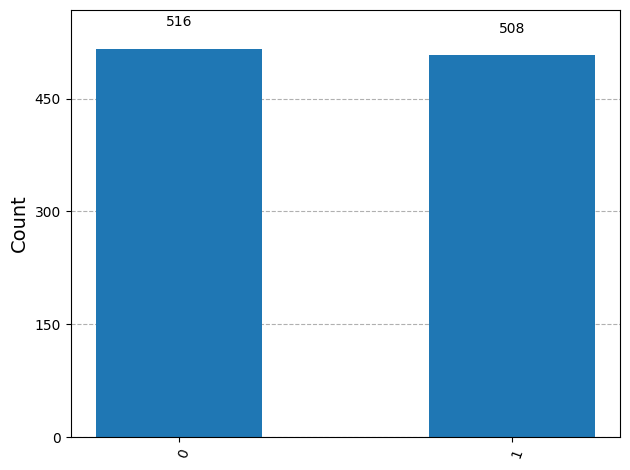

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create the circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Step 2: Choose backend and transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)

# Step 3: Run the circuit
job = backend.run(transpiled, shots=1024)
result = job.result()

# Step 4: Get and plot results
counts = result.get_counts()
plot_histogram(counts)
plt.show()


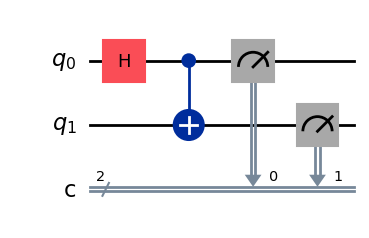

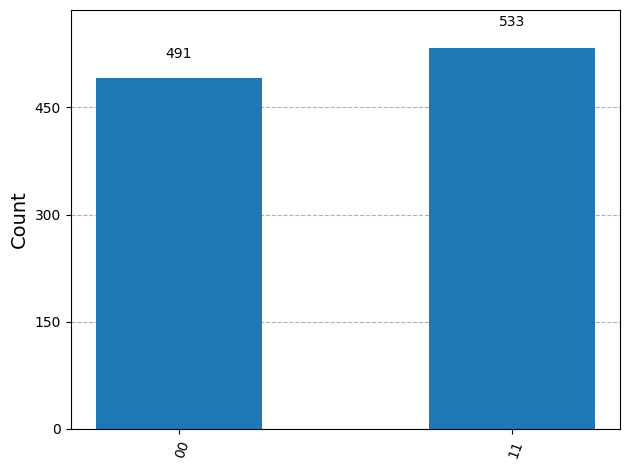

In [3]:
# Circuit diagram of Bell state
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Create 2-qubit entangled circuit (Bell State |Φ+⟩ = (|00⟩ + |11⟩)/√2)
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
# cx(a, b)	Flip qubit b if qubit a is 1 
# cx(0, 1)	Qubit 0 controls Qubit 1
qc.measure(0, 0)
qc.measure(1, 1)

# Show the circuit (like Figure 4.11 part a)
qc.draw(output='mpl')
plt.show()

# Run simulation
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()

# Show the histogram 
counts = result.get_counts()
plot_histogram(counts)
plt.show()

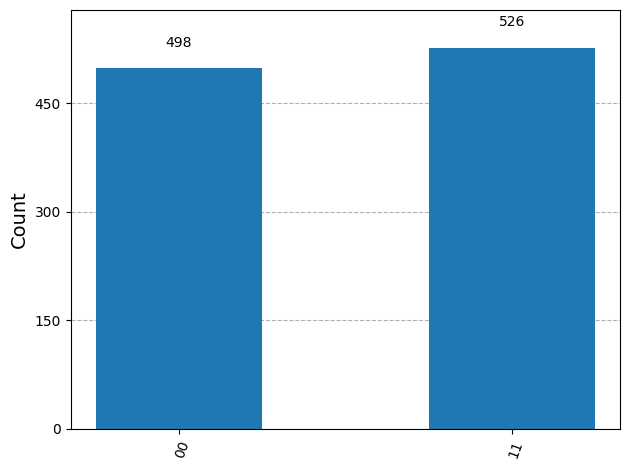

In [4]:
#Creating Bell state (|00⟩ + |11⟩) / √2
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to qubit 0 (creates superposition)
qc.h(0)

# Step 3: Apply CNOT gate (creates entanglement)
qc.cx(0, 1)

# Step 4: Measure both qubits
# Measures each qubit and stores the outcome in corresponding classical bits.
qc.measure(0, 0)
qc.measure(1, 1)

# Step 5: Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Step 6: Plot results
plot_histogram(counts)
plt.show()

#Neither qubit has a defined value until measured — and they collapse together. # Histogram shows only 00 and 11, never 01 or 10

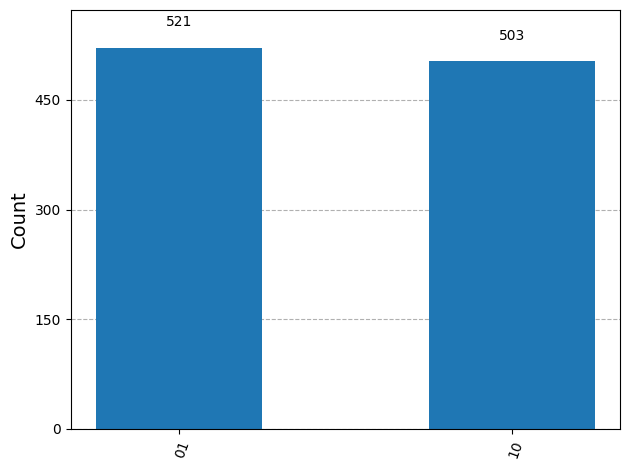

In [5]:
# Creating Bell state (|01⟩ + |10⟩) / √2
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create a 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Prepare |Ψ+⟩ = (|01⟩ + |10⟩)/√2
qc.h(0)          # Put qubit 0 into superposition: (|0⟩ + |1⟩)/√2
qc.cx(0, 1)      # Entangle: creates (|00⟩ + |11⟩)/√2
qc.x(0)          # Flip qubit 0 → swaps |00⟩ to |10⟩ and |11⟩ to |01⟩

# Now the state is (|10⟩ + |01⟩)/√2

# Step 3: Measure both qubits
qc.measure(0, 0)
qc.measure(1, 1)

# Step 4: Run and plot
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()
 # Histogram shows only 01 and 10, never 00 or 11

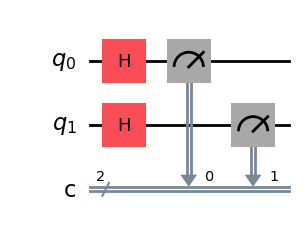

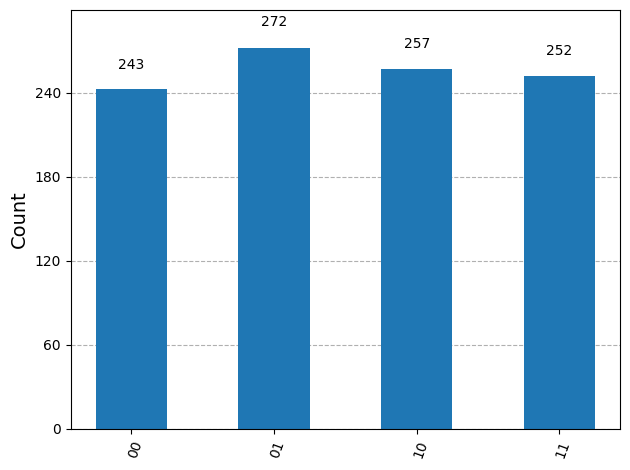

In [6]:
#Two qubits in superposition (|00⟩ + |01⟩ + |10⟩ + |11⟩) / 2
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Create 2-qubit, 2-classical-bit circuit (to match visual mapping in figure)
qc = QuantumCircuit(2, 2)

# Apply Hadamard to both qubits
qc.h(0)
qc.h(1)

# Measure each qubit into a classical bit
qc.measure(0, 0)
qc.measure(1, 1)

# Draw the circuit (like Figure 4.11)
qc.draw(output='mpl')
plt.show()

# Simulate it
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()

# Plot the histogram
counts = result.get_counts()
plot_histogram(counts)
plt.show()

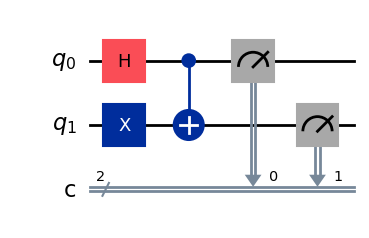

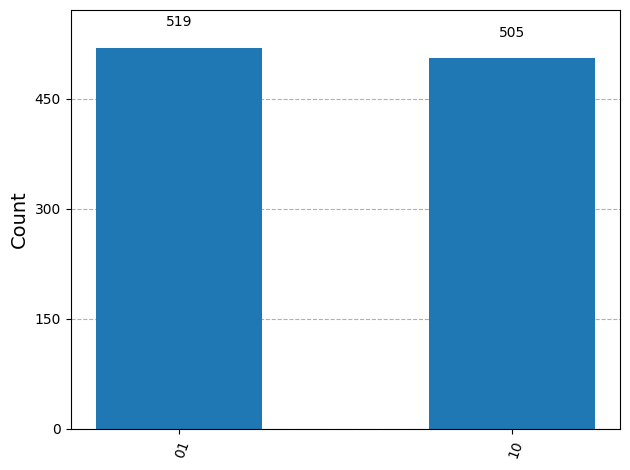

In [7]:
# Creating Bell state with input state |10>
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create 2-qubit, 2-classical-bit circuit
qc = QuantumCircuit(2, 2)

# Step 2: Prepare |01⟩
qc.x(1)  # Flip qubit 1 to |1⟩

# Step 3: Apply Hadamard to qubit 0
qc.h(0)

# Step 4: Apply CNOT (control = 0, target = 1)
qc.cx(0, 1)

# Step 5: Measure both qubits
qc.measure(0, 0)
qc.measure(1, 1)

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
result = job.result()
counts = result.get_counts()

# Plot results
qc.draw(output='mpl')
plt.show()

plot_histogram(counts)
plt.show()


[0.        +0.j,0.70710678+0.j,0.70710678+0.j,0.        +0.j]

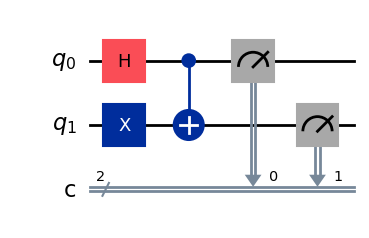

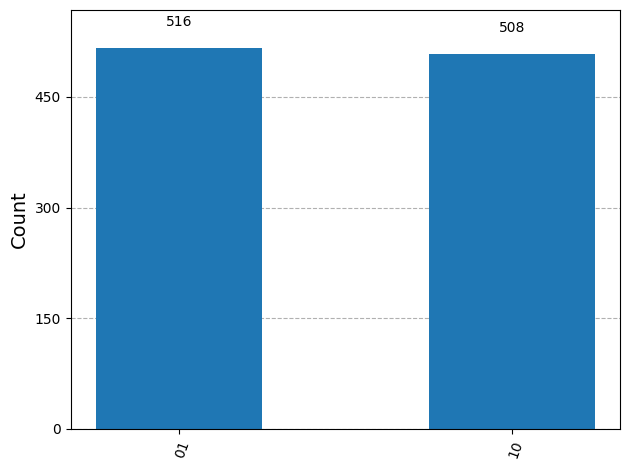

In [8]:
# Creating Bell state with input state |01>
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create circuit
qc = QuantumCircuit(2, 2)

# Step 2: Prepare |01⟩
qc.x(1)

# Step 3: Apply Hadamard on qubit 0
qc.h(0)

# Step 4: CNOT with control=0, target=1
qc.cx(0, 1)

# Optional: Visualize state before measurement
state = Statevector.from_instruction(qc)
display(state.draw('text'))
plt.show()

# Step 5: Add measurement
qc.measure(0, 0)
qc.measure(1, 1)

# Step 6: Simulate
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
counts = job.result().get_counts()

# Step 7: Plot circuit and histogram
qc.draw(output='mpl')
plt.show()

plot_histogram(counts)
plt.show()


[ 0.        +0.j,-0.70710678+0.j, 0.70710678+0.j, 0.        +0.j]

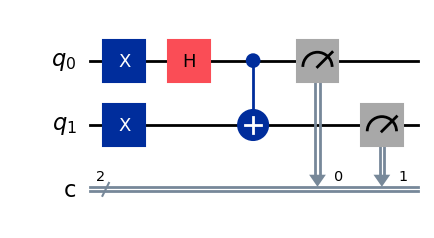

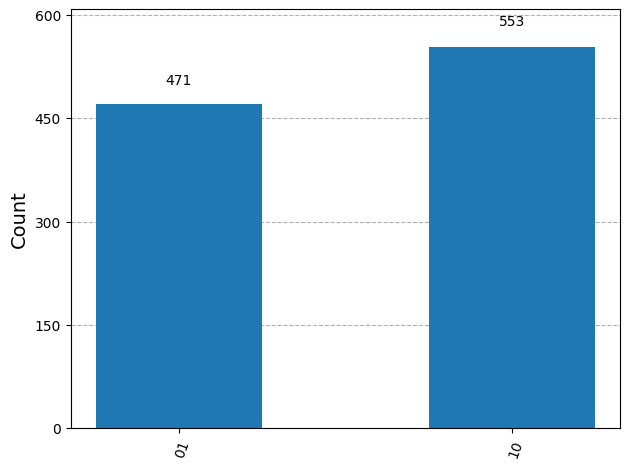

In [9]:
# Creating Bell state with input state |11>
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: Create a 2-qubit circuit with classical bits
qc = QuantumCircuit(2, 2)

# Step 2: Prepare |11⟩
qc.x(0)
qc.x(1)

# Step 3: Apply Hadamard on qubit 0
qc.h(0)

# Step 4: Apply CNOT (control=0, target=1)
qc.cx(0, 1)

# Step 5: Visualize statevector before measurement
state = Statevector.from_instruction(qc)
display(state.draw('text'))
plt.show()

# Step 6: Add measurement
qc.measure(0, 0)
qc.measure(1, 1)

# Step 7: Simulate and plot
backend = Aer.get_backend('qasm_simulator')
transpiled = transpile(qc, backend)
job = backend.run(transpiled, shots=1024)
counts = job.result().get_counts()

qc.draw(output='mpl')
plt.show()

plot_histogram(counts)
plt.show()


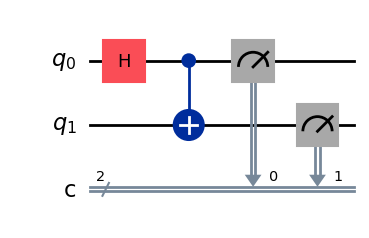

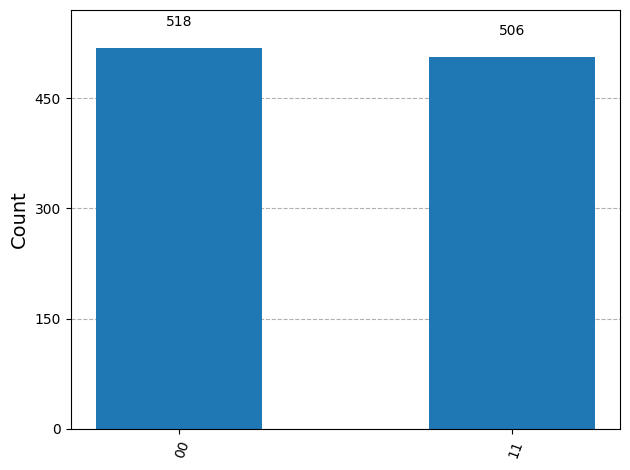

Measurement counts: {'11': 506, '00': 518}


In [10]:
# Import necessary Qiskit modules
from qiskit import QuantumCircuit, transpile        # For building and compiling quantum circuits
from qiskit_aer import Aer                          # Aer provides simulation backends
from qiskit.visualization import plot_histogram     # For plotting measurement results
import matplotlib.pyplot as plt                     # For displaying plots

%matplotlib inline
# Step 1: Create a quantum circuit with 2 qubits and 2 classical bits
# We'll use 2 qubits to create an entangled state (Bell state),
# and 2 classical bits to store the measurement results
qc = QuantumCircuit(2, 2)

# Step 2: Apply a Hadamard gate to qubit 0
# This puts qubit 0 into a superposition: (|0⟩ + |1⟩)/√2
qc.h(0)

# Step 3: Apply a CNOT gate with control qubit 0 and target qubit 1
# This entangles the two qubits, creating the Bell state (|00⟩ + |11⟩)/√2
qc.cx(0, 1)

# Step 4: Measure both qubits
# The measurement collapses the quantum state into classical values (00 or 11)
qc.measure(0, 0)  # Measure qubit 0 into classical bit 0
qc.measure(1, 1)  # Measure qubit 1 into classical bit 1

# Step 5: Choose the Aer simulator backend
# 'qasm_simulator' simulates a quantum computer that performs measurements
backend = Aer.get_backend('qasm_simulator')

# Step 6: Transpile the circuit to optimize it for the selected backend
transpiled = transpile(qc, backend)

# Step 7: Execute the circuit on the simulator with 1024 repetitions (shots)
# This gives us statistics over many runs of the experiment
job = backend.run(transpiled, shots=1024)

# Step 8: Retrieve the result and extract the counts of each measurement outcome
result = job.result()
counts = result.get_counts()

# Step 9: Draw the quantum circuit diagram
qc.draw(output="mpl")
plt.show()

# Step 10: Plot a histogram of the measurement results
# Expect to see only '00' and '11' with roughly equal probability
plot_histogram(counts)
plt.show()

# Step 11: Print the raw counts dictionary for numerical reference
print("Measurement counts:", counts)
